In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from datetime import datetime
# dont show warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Bank_Loan_DataSet.csv')
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,02-11-2021,9/13/2021,4/13/2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,12/14/2021,1/15/2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,01-05-2021,12-12-2021,01-09-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12-12-2021,03-12-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,12/14/2021,1/15/2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [6]:
df.shape

(38576, 24)

In [7]:
# Let's have a look on the shape of the dataset..........
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 38576, and columns are 24.


In [8]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


In [9]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [17]:
df['emp_title'] = df['emp_title'].fillna(df['emp_title'].mode()[0])
df.isnull().sum()

id                       0
address_state            0
application_type         0
emp_length               0
emp_title                0
grade                    0
home_ownership           0
issue_date               0
last_credit_pull_date    0
last_payment_date        0
loan_status              0
next_payment_date        0
member_id                0
purpose                  0
sub_grade                0
term                     0
verification_status      0
annual_income            0
dti                      0
installment              0
int_rate                 0
loan_amount              0
total_acc                0
total_payment            0
dtype: int64

In [19]:
# Find duplicate rows............
df.duplicated().sum()

0

In [20]:
# Convert dates
df['issue_date'] = pd.to_datetime(df['issue_date'], errors='coerce')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], errors='coerce')
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'], errors='coerce')

In [21]:
# Ensure numeric columns are correct
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
df['dti'] = pd.to_numeric(df['dti'], errors='coerce')

In [27]:
# KPI Calculations
# -----------------------------
today = df['issue_date'].max()  # Assume most recent date is 'today'
mtd_filter = (df['issue_date'].dt.month == today.month) & (df['issue_date'].dt.year == today.year)
print(mtd_filter)

0        False
1        False
2        False
3        False
4        False
         ...  
38571    False
38572    False
38573    False
38574    False
38575    False
Name: issue_date, Length: 38576, dtype: bool


In [23]:
# Totals
total_applications = len(df)
mtd_applications = df[mtd_filter].shape[0]

total_funded = df['loan_amount'].sum()
mtd_funded = df.loc[mtd_filter, 'loan_amount'].sum()

total_received = df['total_payment'].sum()
mtd_received = df.loc[mtd_filter, 'total_payment'].sum()

avg_interest_rate = df['int_rate'].mean()
avg_dti = df['dti'].mean()


In [29]:
# Good Loan (Fully Paid or Current)
good_loans = df[df['loan_status'].isin(['Fully Paid', 'Current'])]
good_loan_percentage = (len(good_loans) / total_applications) * 100
good_loan_funded = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()
print(good_loan_received, good_loan_funded)

435786170 370224850


In [25]:
# Bad Loan (Charged Off)
bad_loans = df[df['loan_status'] == 'Charged Off']
bad_loan_percentage = (len(bad_loans) / total_applications) * 100
bad_loan_funded = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

In [26]:
# KPI Output
# -----------------------------
kpi_results = {
    "Total Loan Applications": total_applications,
    "MTD Loan Applications": mtd_applications,
    "Total Funded Amount": total_funded,
    "MTD Funded Amount": mtd_funded,
    "Total Amount Received": total_received,
    "MTD Amount Received": mtd_received,
    "Average Interest Rate": avg_interest_rate,
    "Average DTI": avg_dti,
    "Good Loan %": good_loan_percentage,
    "Good Loan Funded Amount": good_loan_funded,
    "Good Loan Received Amount": good_loan_received,
    "Bad Loan %": bad_loan_percentage,
    "Bad Loan Funded Amount": bad_loan_funded,
    "Bad Loan Received Amount": bad_loan_received
}

# Display KPIs
for k, v in kpi_results.items():
    print(f"{k}: {v}")

Total Loan Applications: 38576
MTD Loan Applications: 4314
Total Funded Amount: 435757075
MTD Funded Amount: 53981425
Total Amount Received: 473070933
MTD Amount Received: 58074380
Average Interest Rate: 0.12048831397760265
Average DTI: 0.13327433119037743
Good Loan %: 86.17534218166736
Good Loan Funded Amount: 370224850
Good Loan Received Amount: 435786170
Bad Loan %: 13.824657818332643
Bad Loan Funded Amount: 65532225
Bad Loan Received Amount: 37284763


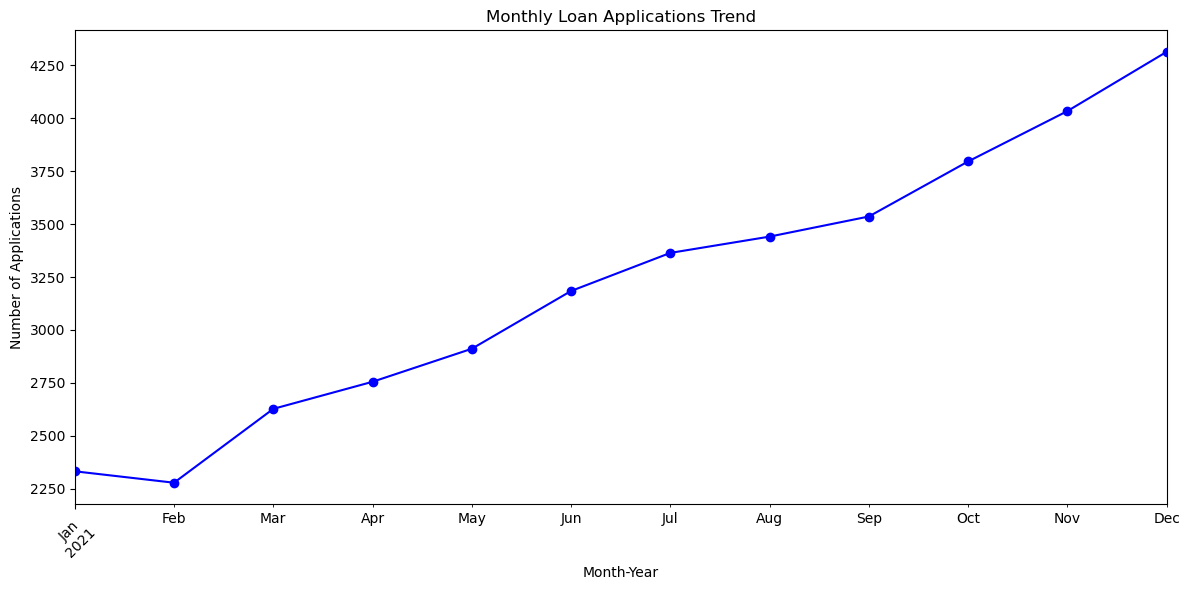

In [31]:
# Chart 1: Monthly Trends
# -----------------------------
df['month_year'] = df['issue_date'].dt.to_period('M')
monthly_trends = df.groupby('month_year').size()

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Loan Applications Trend")
plt.xlabel("Month-Year")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

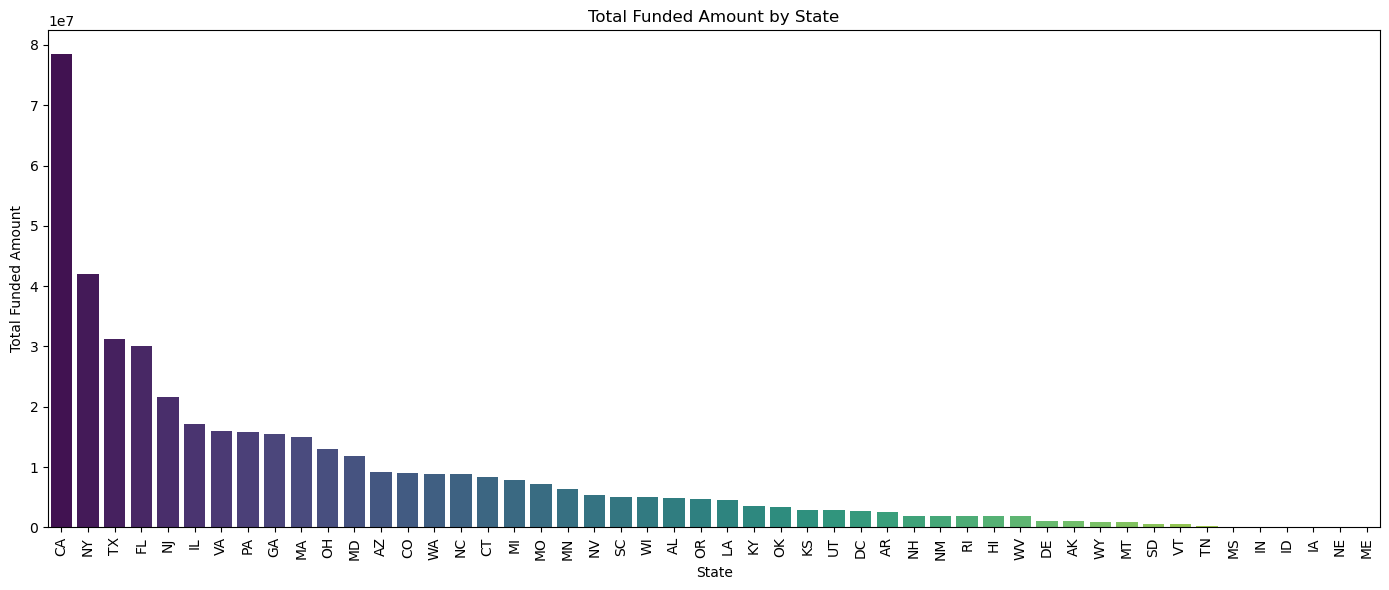

In [32]:
# Chart 2: Regional Analysis by State
# -----------------------------
state_data = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=state_data.index, y=state_data.values, palette="viridis")
plt.title("Total Funded Amount by State")
plt.xlabel("State")
plt.ylabel("Total Funded Amount")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

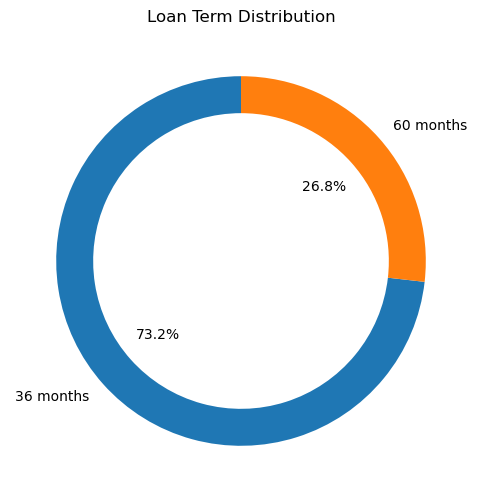

In [45]:
# Chart 3: Loan Term Analysis (Donut Chart)
# -----------------------------
term_counts = df['term'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.2})
plt.title("Loan Term Distribution")
plt.show()

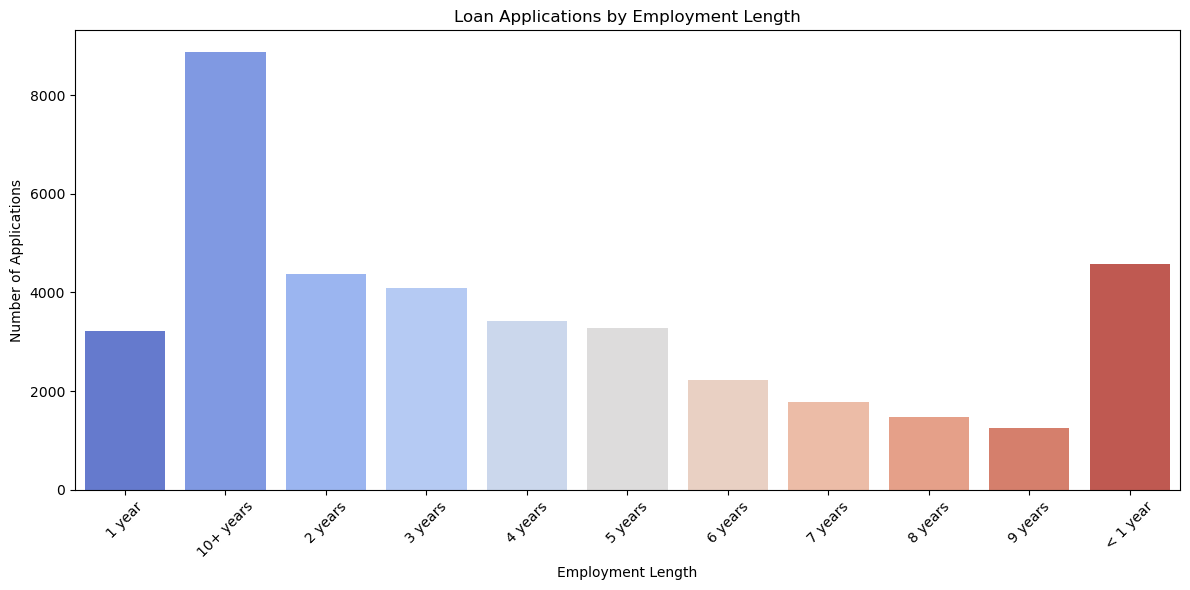

In [40]:
# Chart 4: Employee Length Analysis
# -----------------------------
emp_data = df['emp_length'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=emp_data.index, y=emp_data.values, palette="coolwarm")
plt.title("Loan Applications by Employment Length")
plt.xlabel("Employment Length")
plt.ylabel("Number of Applications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

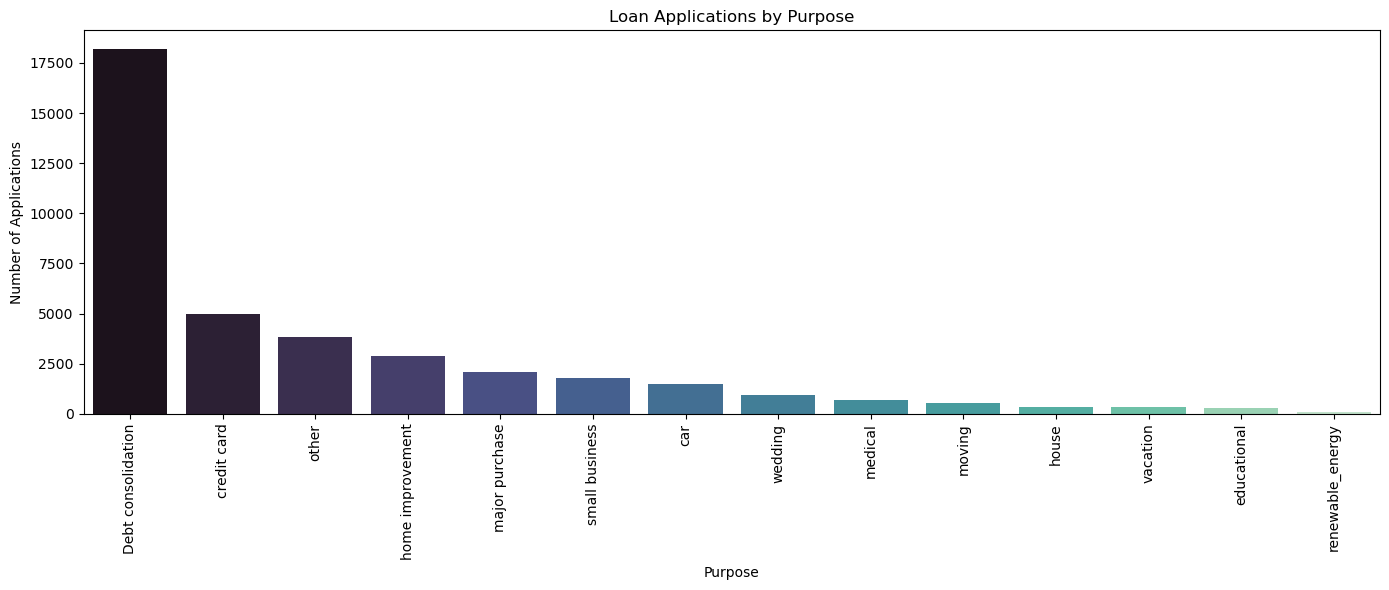

In [41]:
# Chart 5: Loan Purpose Breakdown
# -----------------------------
purpose_data = df['purpose'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(x=purpose_data.index, y=purpose_data.values, palette="mako")
plt.title("Loan Applications by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Number of Applications")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

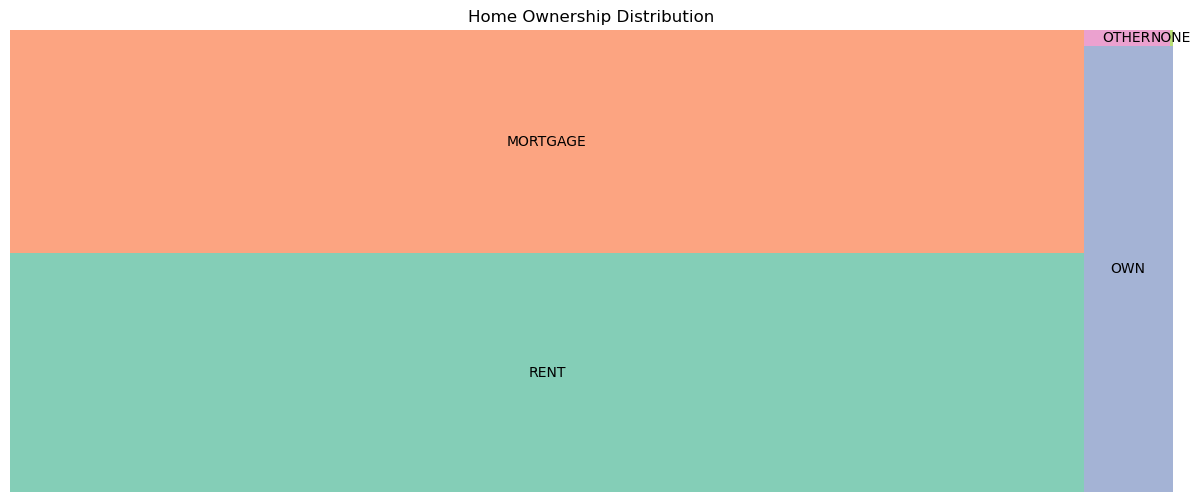

In [44]:
# Chart 6: Home Ownership Analysis (Tree Map)
# -----------------------------
home_data = df['home_ownership'].value_counts()

plt.figure(figsize=(15, 6))
squarify.plot(sizes=home_data.values, label=home_data.index, 
              color=sns.color_palette("Set2", len(home_data)), alpha=0.8)
plt.title("Home Ownership Distribution")
plt.axis('off')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# Convert loan_status to binary target
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x in ['Fully Paid', 'Current'] else 0)

In [49]:
# Select features
features = ['loan_amount', 'term', 'int_rate', 'dti', 'annual_income',
            'emp_length', 'home_ownership', 'purpose', 'address_state', 'total_acc']
X = df[features]
y = df['loan_status']

In [50]:
# Identify categorical and numeric columns
categorical_cols = ['term', 'emp_length', 'home_ownership', 'purpose', 'address_state']
numeric_cols = ['loan_amount', 'int_rate', 'dti', 'annual_income', 'total_acc']

In [51]:
# Preprocessing: OneHotEncode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ])

In [52]:
# Create pipeline with RandomForest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train the model
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8606791083462935

Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.01      0.03      1064
           1       0.86      1.00      0.92      6652

    accuracy                           0.86      7716
   macro avg       0.61      0.50      0.48      7716
weighted avg       0.79      0.86      0.80      7716


Confusion Matrix:
 [[  14 1050]
 [  25 6627]]


In [59]:
# User Input for Prediction


print("\nEnter Applicant Details for Loan Prediction:")

loan_amount = float(input("Loan Amount: "))
term = input("Term (e.g., '36 months', '60 months'): ")
int_rate = float(input("Interest Rate (e.g., 0.15 for 15%): "))
dti = float(input("Debt-to-Income Ratio (e.g., 0.2 for 20%): "))
annual_income = float(input("Annual Income: "))
emp_length = input("Employment Length (e.g., '10+ years', '< 1 year', '2 years'): ")
home_ownership = input("Home Ownership (e.g., 'OWN', 'MORTGAGE', 'RENT'): ")
purpose = input("Purpose (e.g., 'debt_consolidation', 'credit_card', 'home_improvement'): ")
address_state = input("State Code (e.g., 'CA', 'TX', 'NY'): ")
total_acc = int(input("Total Credit Accounts: "))

# Create DataFrame from user input
user_df = pd.DataFrame([{
    'loan_amount': loan_amount,
    'term': term,
    'int_rate': int_rate,
    'dti': dti,
    'annual_income': annual_income,
    'emp_length': emp_length,
    'home_ownership': home_ownership,
    'purpose': purpose,
    'address_state': address_state,
    'total_acc': total_acc
}])

# Predict
prediction = model.predict(user_df)[0]
result = "GOOD LOAN............. " if prediction == 1 else "BAD LOAN............. "
print("\nPrediction Result:", result)


Enter Applicant Details for Loan Prediction:


Loan Amount:  500000
Term (e.g., '36 months', '60 months'):  24
Interest Rate (e.g., 0.15 for 15%):  10
Debt-to-Income Ratio (e.g., 0.2 for 20%):  10
Annual Income:  1000000
Employment Length (e.g., '10+ years', '< 1 year', '2 years'):  4
Home Ownership (e.g., 'OWN', 'MORTGAGE', 'RENT'):  OWN
Purpose (e.g., 'debt_consolidation', 'credit_card', 'home_improvement'):  credit_card
State Code (e.g., 'CA', 'TX', 'NY'):  CA
Total Credit Accounts:  50000



Prediction Result: GOOD LOAN ✅
